In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
url ='headbrain.csv'
data = pd.read_csv(url)
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [21]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [53]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 1
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)

# Print cosfficients
print(b1, b0)

0.2634293712493915 325.57330563389917


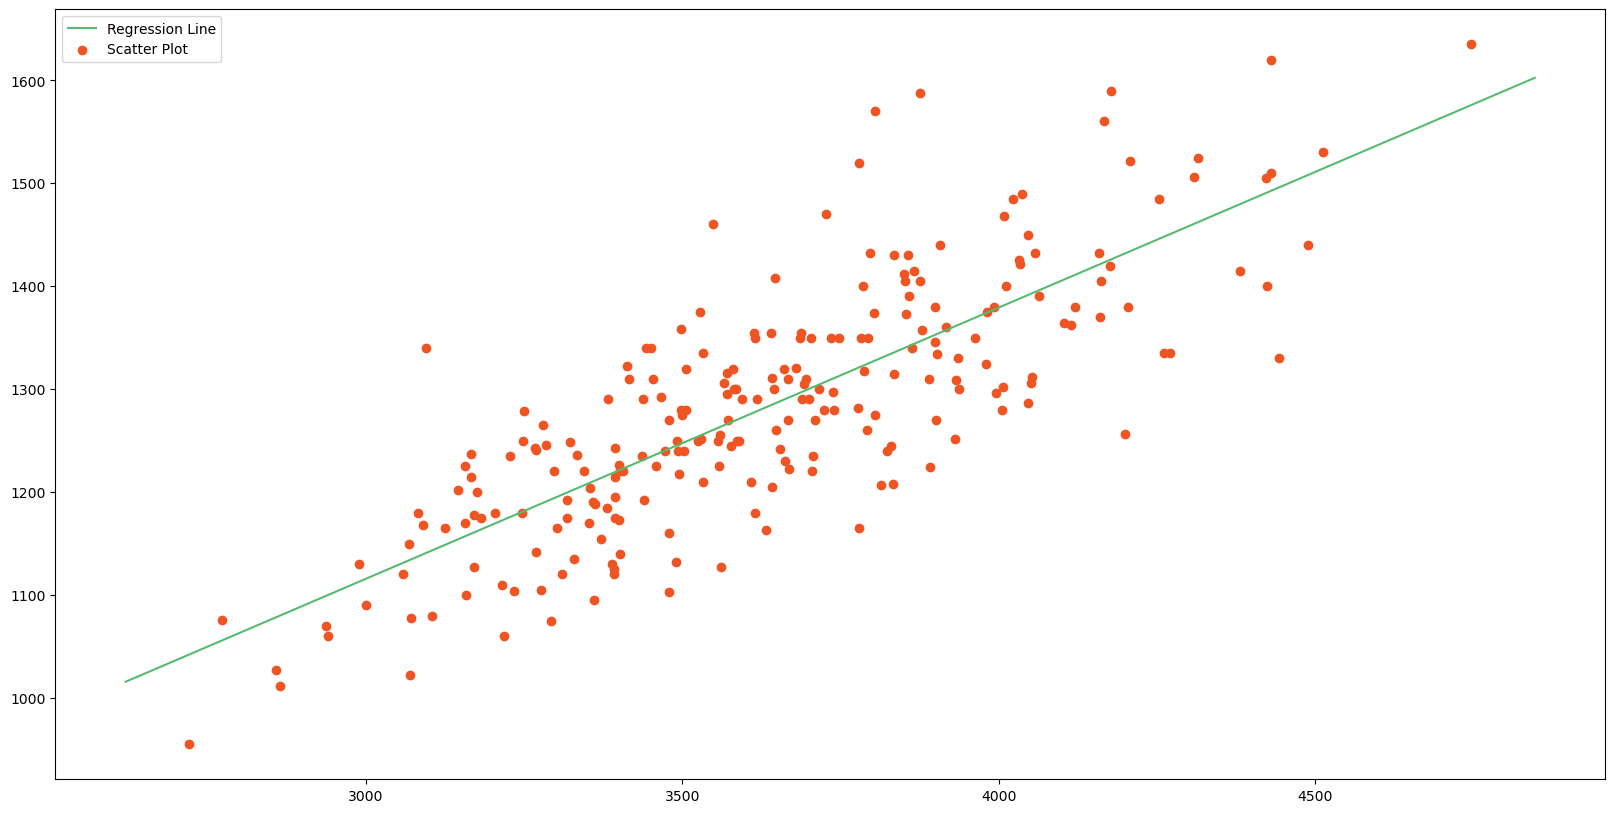

In [55]:
# Plotting Values and Pregression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating Line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting Line
plt.plot(x, y, color = '#58b970', label = 'Regression Line')
# Plotting Scatter Points 
plt.scatter(X, Y, color = '#ef5423', label = 'Scatter Plot')

plt.xlabel = 'Head Size(cm^3)'
plt.ylabel = 'Brain Weight(grams)'
plt.legend()
plt.show()

In [57]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2

r2 = 1- (ss_r/ss_t)
print(r2)

0.6393117199569908


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating R2 Score
r2_score = reg.score(X, Y)
print(r2_score)

0.639311719957
